# Data

Please unzip the data file before running the code. ("/workspaces/Data-Processing/Works/W_1/job_postings.csv.zip)

In [15]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/workspaces/Procesamiento-Datos/Workshops/W_1/Data/job_postings.csv')

# Display the DataFrame
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/Procesamiento-Datos/Workshops/W_1/Data/job_postings.csv'

In [2]:
length = len(df)
print(length)

33246


# Demand

## Jobs

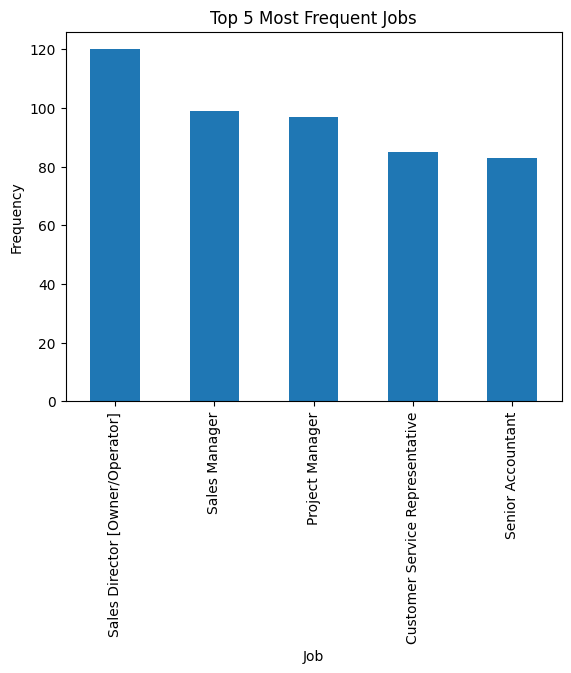

In [17]:
import matplotlib.pyplot as plt

# Get the top 5 most frequent jobs
top_5_jobs = df['title'].value_counts().nlargest(5)

# Plot the top 5 most frequent jobs
top_5_jobs.plot(kind='bar')

# Set the title and labels for the plot
plt.title('Top 5 Most Frequent Jobs')
plt.xlabel('Job')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Salary

In [3]:
missing_values_count = df.loc[df['pay_period'] == 'YEARLY', ['max_salary', 'med_salary', 'min_salary']].isnull().sum()

# Print the count of missing values in the 'max_salary', 'med_salary', and 'min_salary' columns
print(missing_values_count)

max_salary     617
med_salary    7392
min_salary     617
dtype: int64


In [4]:
filtered_df = df[df['pay_period'] == 'YEARLY'][['title','job_id', 'max_salary', 'pay_period']]
filtered_df.dropna(inplace=True)
filtered_df

,title,job_id,max_salary,pay_period
4,Principal Cloud Security Architect (Remote),3757937095,275834.0,YEARLY
11,Insights Analyst - Auto Industry,3757935381,64000.0,YEARLY
19,Sales Manager,3757935001,350000.0,YEARLY
27,Controls Engineer,3757934319,150000.0,YEARLY
33,"Senior Manager, Indirect Procurement",3757934281,143000.0,YEARLY
...,...,...,...,...
33212,"Manager, Salesforce Platform",2148434586,170976.0,YEARLY
33226,Human Resources Senior Manager,1545216695,180000.0,YEARLY
33236,Office Associate,903408693,42000.0,YEARLY
33244,Licensed Insurance Agent,85008768,52000.0,YEARLY


In [5]:
# Read the job_industries.csv file into a DataFrame
job_industries_df = pd.read_csv('/workspaces/Procesamiento-Datos/Workshops/W_1/Data/job_industries.csv')

# Merge the job_industries_df DataFrame with the filtered_df DataFrame on the 'job_id' column
merged_df = pd.merge(filtered_df, job_industries_df, on='job_id')

# Display the merged DataFrame
merged_df

,title,job_id,max_salary,pay_period,industry_id
0,Principal Cloud Security Architect (Remote),3757937095,275834.0,YEARLY,27
1,Principal Cloud Security Architect (Remote),3757937095,275834.0,YEARLY,25
2,Principal Cloud Security Architect (Remote),3757937095,275834.0,YEARLY,6
3,Insights Analyst - Auto Industry,3757935381,64000.0,YEARLY,97
4,Sales Manager,3757935001,350000.0,YEARLY,43
...,...,...,...,...,...
10620,Human Resources Senior Manager,1545216695,180000.0,YEARLY,104
10621,Office Associate,903408693,42000.0,YEARLY,27
10622,Office Associate,903408693,42000.0,YEARLY,34
10623,Licensed Insurance Agent,85008768,52000.0,YEARLY,42


In [6]:
# Read the industries.csv file into a DataFrame
industries_df = pd.read_csv('/workspaces/Procesamiento-Datos/Workshops/W_1/Data/industries.csv')

# Merge the industries_df DataFrame with the merged_df DataFrame on the 'industry_id' column
merged_df = pd.merge(merged_df, industries_df, on='industry_id')

# Display the merged DataFrame
merged_df


,title,job_id,max_salary,pay_period,industry_id,industry_name
0,Principal Cloud Security Architect (Remote),3757937095,275834.0,YEARLY,27,Retail
1,Production Manager,3757921575,65000.0,YEARLY,27,Retail
2,Sleep Expert - Sales,3757918069,98000.0,YEARLY,27,Retail
3,Sleep Expert - Sales,3757915601,98000.0,YEARLY,27,Retail
4,"Sr. Manager, Product Management - Assortment",3757771621,201900.0,YEARLY,27,Retail
...,...,...,...,...,...,...
10620,Project Controls Mgr - 90359320 - New York,3693586570,143200.0,YEARLY,1481,Rail Transportation
10621,Digital Content Producer,3693584851,70000.0,YEARLY,3237,Entertainment
10622,Leave Manager,3693051432,140000.0,YEARLY,131,Philanthropic Fundraising Services
10623,Grants Manager,3243289926,80000.0,YEARLY,131,Philanthropic Fundraising Services


In [18]:
filtered_df = merged_df.loc[:, ['job_id','title','max_salary', 'industry_name']]
filtered_df


,job_id,title,max_salary,industry_name
0,3757937095,Principal Cloud Security Architect (Remote),275834.0,Retail
1,3757921575,Production Manager,65000.0,Retail
2,3757918069,Sleep Expert - Sales,98000.0,Retail
3,3757915601,Sleep Expert - Sales,98000.0,Retail
4,3757771621,"Sr. Manager, Product Management - Assortment",201900.0,Retail
...,...,...,...,...
10620,3693586570,Project Controls Mgr - 90359320 - New York,143200.0,Rail Transportation
10621,3693584851,Digital Content Producer,70000.0,Entertainment
10622,3693051432,Leave Manager,140000.0,Philanthropic Fundraising Services
10623,3243289926,Grants Manager,80000.0,Philanthropic Fundraising Services


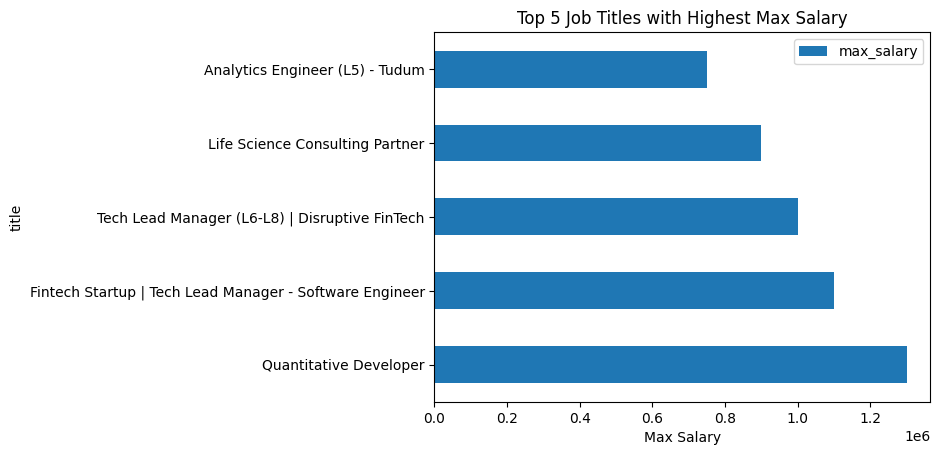

In [14]:
# Get the jobs without repetition (only the max per each one)
unique_jobs = merged_df.drop_duplicates(subset='title', keep='last')

# Plot the top 5 job titles with the highest max salary
top_5_max_salary = unique_jobs.nlargest(5, 'max_salary')
top_5_max_salary.plot(x='title', y='max_salary', kind='barh')

# Set the title and labels for the plot
plt.title('Top 5 Job Titles with Highest Max Salary')
plt.xlabel('Max Salary')

# Display the plot
plt.show()
